# Week 03 Linear Regression Lab

- Course: Z604 Music Data Mining 
- Instructor: Kahyun Choi 

Download data files of the week from GitHub

- Deezer MSD Mood Dataset I with three one dimensional features (`moodmsdfeatures.csv`): https://drive.google.com/open?id=1CHuOsBQbVCNKHu049P2u-vvd5FwRyAVs

In [1]:
# if you meet "fatal: destination path 'W03' already exists and is not an empty directory" error, uncomment the line below and run again
# !rm -fr W03/
!git clone https://github.com/music-data-mining/W03.git

Cloning into 'W03'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [2]:
# go to the directory of the week
%cd W03

/content/W03


# Setup

In [3]:
# Common imports
import os
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# a helper function for saving figures
def save_fig(fig_name, tight_layout=True):
    path = os.path.join(fig_name + ".png")
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Relationship between Celsius and Fahrenheit

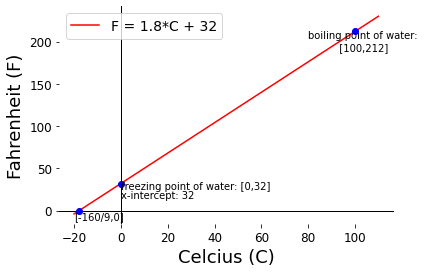

In [4]:
# linspace return 131 evenly spaced numbers between -20 and 110 
C = np.linspace(-20, 110, 131) # [-20. -19. -18. ... 108. 109. 110.]
F = 1.8*C + 32 # [ -4.   -2.2  -0.4 ... 226.4 228.2 230. ]

plt.figure(figsize=(6,4))
plt.plot(C, F, "r-", label="F = 1.8*C + 32")
plt.xlabel("Celcius (C)", fontsize=18)
plt.ylabel("Fahrenheit (F)", rotation=90, fontsize=18)
plt.axvline(linewidth=1, color='k')
plt.axhline(linewidth=1, color='k')
plt.legend(loc="upper left", fontsize=14)

plt.plot(100,212,'bo',0,32,'bo',-160/9,0,'bo')
plt.text(80,190,"boiling point of water: \n          [100,212]")
plt.text(0,25,"freezing point of water: [0,32]")
plt.text(0,15,"x-intercept: 32")
plt.text(-20,-10,"[-160/9,0]")

plt.box(False)
plt.show()

## Linear Relationships between X and Y

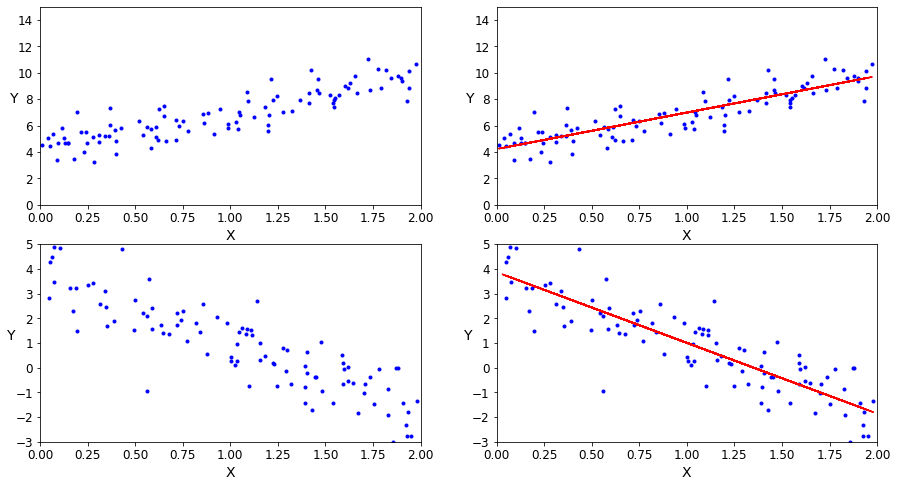

In [5]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y", rotation=0)
plt.axis([0, 2, 0, 15])

plt.subplot(2,2,2)
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # sklearn.linear_model.LinearRegression finds a linear model
reg.fit(X, y) # fit linear model
predictions = reg.predict(X) # predicts using the learned linear model

plt.plot(X,y,'b.',X, predictions, 'r-') # plot the linear model on top of the original data
plt.xlabel("X")
plt.ylabel("Y", rotation=0)
plt.axis([0, 2, 0, 15])


plt.subplot(2,2,3)
X = 2 * np.random.rand(100, 1)
y = 4 - 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y", rotation=0)
plt.axis([0, 2, -3, 5])


plt.subplot(2,2,4)
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)

plt.plot(X,y,'b.',X, predictions, 'r-')
plt.xlabel("X")
plt.ylabel("Y", rotation=0)
plt.axis([0, 2, -3, 5])
plt.show()

## Non-linear relationships between X and Y

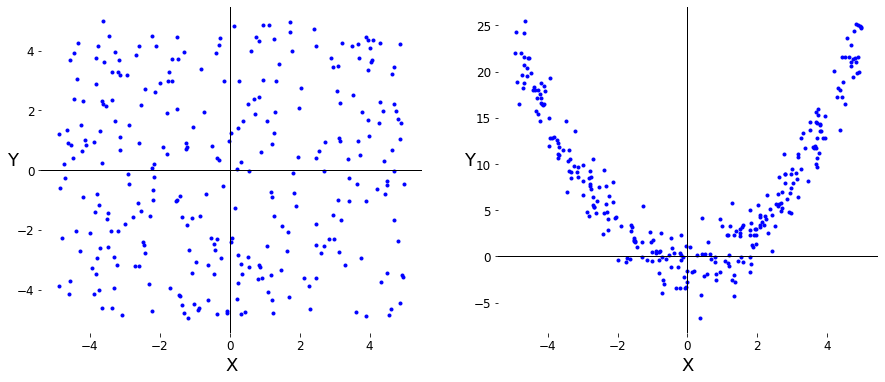

In [6]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
X = 10*np.random.rand(300)-5
Y = 10*np.random.rand(300)-5

plt.plot(X, Y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.axvline(linewidth=1, color='k')
plt.axhline(linewidth=1, color='k')
plt.box(False)

plt.subplot(1,2,2)
X = 10*np.random.rand(300)-5 
Y = X**2 - 1 + 2*np.random.randn(300)

plt.plot(X, Y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.axvline(linewidth=1, color='k')
plt.axhline(linewidth=1, color='k')
plt.box(False)

## Univariate Linear Regression Example (Six Observations)

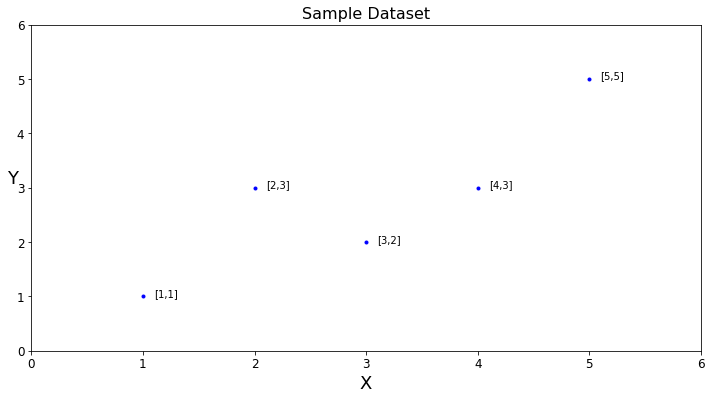

In [7]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[1],[3],[3],[2],[5]])
plt.figure(figsize=(12,6))
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([0, 6, 0, 6])
plt.title("Sample Dataset", fontsize=16)

plt.text(1+0.1,1,"[1,1]")
plt.text(2+0.1,3,"[2,3]")
plt.text(3+0.1,2,"[3,2]")
plt.text(4+0.1,3,"[4,3]")
plt.text(5+0.1,5,"[5,5]")


# plt.text(0,15,"x-intercept: 32")
# plt.text(0,15,"x-intercept: 32")
# plt.text(0,15,"x-intercept: 32")

plt.show()

Model 1: Y = 0.8 * X + 0.4

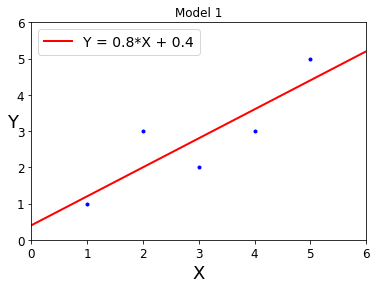

In [8]:
X_new = np.array([[0], [6]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
theta = np.array([[0.4], [0.8]])
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Y = 0.8*X + 0.4")
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 6, 0, 6])
plt.title("Model 1")
plt.show()

Model 2: Y = 0.8 * X + 0.1

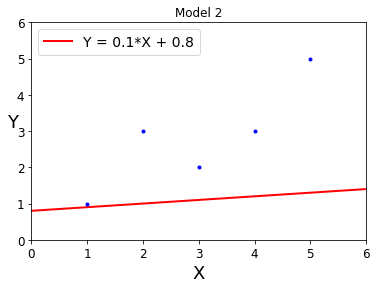

In [9]:
x_vals = np.array([[0], [6]])
y_vals = 0.8 + 0.1 * x_vals

plt.plot(x_vals, y_vals, "r-", linewidth=2, label="Y = 0.1*X + 0.8")
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 6, 0, 6])
plt.title("Model 2")
plt.show()

Model 3: Y = 0.4 * X + 3

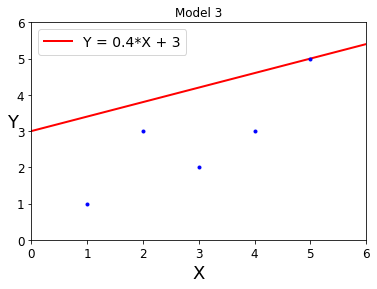

In [10]:
x_vals = np.array([[0], [6]])
y_vals = 3 + 0.4 * x_vals

plt.plot(x_vals, y_vals, "r-", linewidth=2, label="Y = 0.4*X + 3")
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 6, 0, 6])
plt.title("Model 3")
plt.show()

Model 1 without the observations

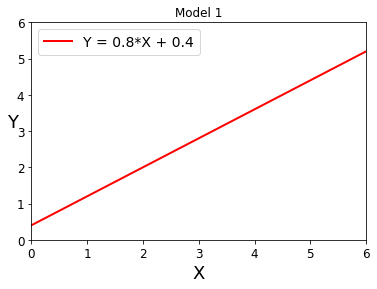

In [11]:
X_new = np.array([[0], [6]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
theta = np.array([[0.4], [0.8]])
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Y = 0.8*X + 0.4")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 6, 0, 6])
plt.title("Model 1")
plt.show()

## Prediction Errors

In [12]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[1],[3],[3],[2],[5]])

y2 = 0.8*X + 0.4
cost = np.mean((y2-y)**2)
print("Cost of y2 = 0.4*X + 0.8: ",cost)

y2 = 0.1*X + 0.8
cost = np.mean((y2-y)**2)
print("Cost of y2 = 0.1*X + 0.8: ",cost)

y2 = 0.4*X + 3
cost = np.mean((y2-y)**2)
print("Cost of y2 = 0.4*X + 3: ",cost)

Cost of y2 = 0.4*X + 0.8:  0.48
Cost of y2 = 0.1*X + 0.8:  4.35
Cost of y2 = 0.4*X + 3:  2.7599999999999993


## Optimization of Cost Function

Argmin of the cost function:  0.8
Argmin of the cost function:  0.8


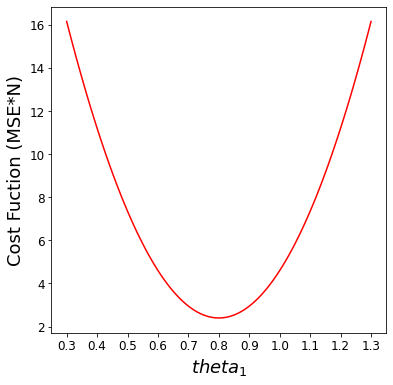

In [13]:
theta1 = np.linspace(-0.5, 0.5, 101) +0.8
theta1Ticks=np.linspace(-0.5, 0.5, 11) +0.8
theta0 = 0.4
N = 5
l = np.sum(X**2)*(theta1**2) + 2*np.sum(theta0*X-X*y)*theta1 + N*(theta0**2) + np.sum(y**2-2*theta0*y)

print('Argmin of the cost function: ', theta1[np.argmin(l)])
print('Argmin of the cost function: ', np.sum(y*X-theta0*X)/np.sum(X**2))

plt.figure(figsize=(6,6))
plt.plot(theta1, l,'r')
plt.xlabel("$theta_1$", fontsize=18)
plt.ylabel("Cost Fuction (MSE*N)", rotation=90, fontsize=18)
plt.xticks(theta1Ticks)
plt.show()

## Centering X

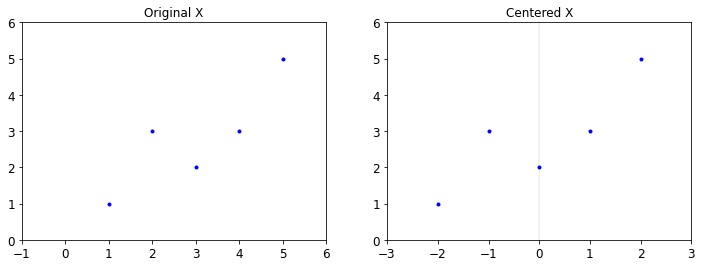

In [14]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[1],[3],[3],[2],[5]])

X_c = X-np.mean(X) # mean of X_c = 0

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(X, y, "b.")
plt.axis([-1, 6, 0,6])
plt.title("Original X")

plt.subplot(1,2,2)
plt.plot(X_c, y, "b.")
plt.axvline(linewidth=0.1, color='k')
plt.axis([-3, 3, 0, 6])
plt.title("Centered X") 
plt.show()

## The Normal Equation with Centered X

In [15]:
N = 5
theta1 = np.sum(X_c*y)/np.sum(X_c**2)
print(theta1)

theta0 = np.sum(y)/N 
print(theta0)

theta0_o = theta0-theta1*np.mean(X)
print(theta0_o)

print("The linear model is: y = {:.5} + {:.5}*X".format(theta0_o, theta1))

0.8
2.8
0.39999999999999947
The linear model is: y = 0.4 + 0.8*X


## The Normal Equation with Original Data

In [16]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[1],[3],[3],[2],[5]])

X_b = np.c_[np.ones((5, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("The linear model is: y = {:.5} + {:.5}*X".format(theta_best[0][0], theta_best[1][0]))
# The linear model is: y = 0.4 + 0.8*X

The linear model is: y = 0.4 + 0.8*X


In [17]:
X_new = np.array([[0], [6]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0.4]
 [5.2]]


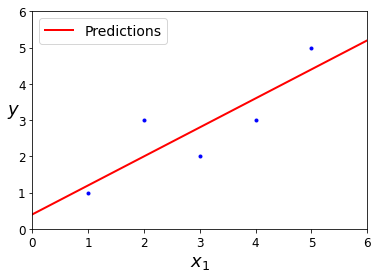

In [18]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 6, 0, 6])
#save_fig("linear_model_predictions")
plt.show()

## sklearn.linear_model.LinearRegression()

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("The linear model is: y = {:.5} + {:.5}*X".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

The linear model is: y = 0.4 + 0.8*X


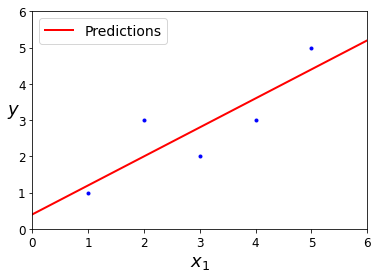

In [20]:
X_new = np.array([[0], [6]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 6, 0, 6])
plt.show()

# R Squared Examples

mean of y:  2.8


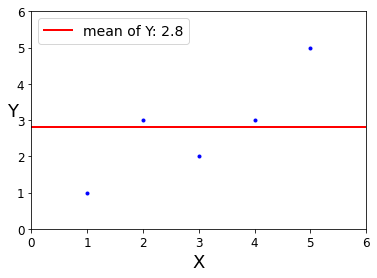

Variance of y:  8.8
Variance of y2 = 0.4*X + 0.8:  2.4
R sqaured: 0.73


In [21]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[1],[3],[3],[2],[5]])

print("mean of y: ", np.mean(y)) #  np.mean(y) = 2.8

x_vals = np.array([[0], [6]])
y_vals = 2.8+0*x_vals # np.mean(y) = 2.8
plt.plot(x_vals, y_vals, "r-", linewidth=2, label="mean of Y: 2.8")
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 6, 0, 6])
plt.show()

varY = np.sum((y-np.mean(y))**2) # 8.8
print("Variance of y: ",varY)

y2 = 0.8*X + 0.4
varY2 = np.sum((y2-y)**2)
print("Variance of y2 = 0.4*X + 0.8: ",varY2)

r2 = 1- varY2/varY
print("R sqaured: {:.2f}".format(r2))

In [22]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[1],[3],[3],[2],[5]])

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

from sklearn.metrics import mean_squared_error, r2_score
print("The linear model is: y = {:.5} + {:.5}*X".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))
print('Coefficient of determination: {:.2f}'.format(r2_score(y, y_pred)))
print('Mean squared error: {:.2f}'.format(mean_squared_error(y, y_pred)))

The linear model is: y = 0.4 + 0.8*X
Coefficient of determination: 0.73
Mean squared error: 0.48


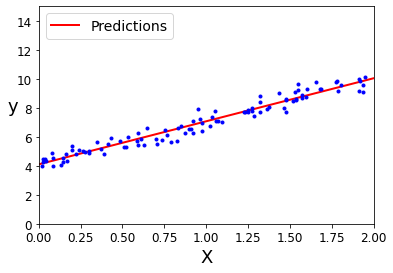

The linear model is: y = 4.1039 + 2.968*X
R Squared score: 0.95
Mean squared error: 0.15


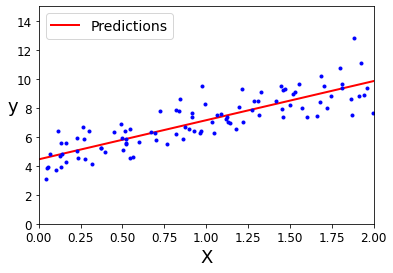

The linear model is: y = 4.4477 + 2.6986*X
R Squared score: 0.73
Mean squared error: 0.91


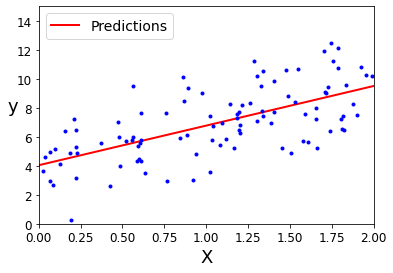

The linear model is: y = 4.0419 + 2.7318*X
R Squared score: 0.42
Mean squared error: 3.4


In [23]:
for alpha in [0.4, 1, 2]:
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)*alpha


    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
    y_predict = X_new_b.dot(theta_best)


    plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
    plt.plot(X, y, "b.")
    plt.xlabel("X", fontsize=18)
    plt.ylabel("y", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([0, 2, 0, 15])
    plt.show()

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X)
    print("The linear model is: y = {:.5} + {:.5}*X".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))
    from sklearn.metrics import mean_squared_error, r2_score
    print("R Squared score: {:.2}".format(r2_score(y, y_pred)))
    print('Mean squared error: {:.2}'.format(mean_squared_error(y, y_pred)))

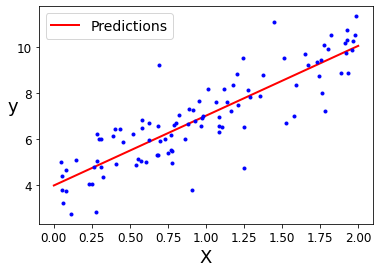

The linear model is: y = 3.9737 + 3.0319*X
R Squared score: 0.75
Mean squared error: 1.0


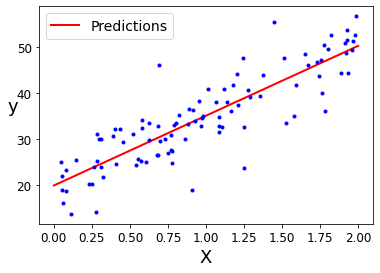

The linear model is: y = 19.868 + 15.159*X
R Squared score: 0.75
Mean squared error: 2.5e+01


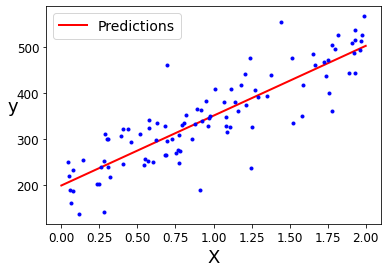

The linear model is: y = 198.68 + 151.59*X
R Squared score: 0.75
Mean squared error: 2.5e+03


In [24]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
for alpha in [1, 5, 10]:
    y = alpha*y

    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
    y_predict = X_new_b.dot(theta_best)

    plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
    plt.plot(X, y, "b.")
    plt.xlabel("X", fontsize=18)
    plt.ylabel("y", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    #plt.axis([0, 2, 0, 15])
    plt.show()

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X)
    print("The linear model is: y = {:.5} + {:.5}*X".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))
    from sklearn.metrics import mean_squared_error, r2_score
    print("R Squared score: {:.2}".format(r2_score(y, y_pred)))
    print('Mean squared error: {:.2}'.format(mean_squared_error(y, y_pred)))

## Exploring Deezer MSD Mood Dataset I (Three one dimensional MSD Features -- mode, tempo, and loudness)

Reference
- Deezer_mood_detection_dataset: https://github.com/deezer/deezer_mood_detection_dataset
- Million Song Dataset: http://millionsongdataset.com/pages/example-track-description/

In [25]:
data = pd.read_csv('moodmsdfeatures.csv')  # load data set

In [26]:
data.head(2) # Return the first 2 rows

,dzr_sng_id,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name,mode,tempo,loudness,quadrant
0,560270,SOTFUBR12A8C13E3EC,TRAYKVH128F42AC993,0.373325,-0.923151,Faithless,Mass Destruction,1,88.740,-5.509,4
1,560274,SOULDME12AB01887C6,TRATCMK12903CABAC8,0.373325,-0.923151,Faithless,Salva Mea,0,128.067,-9.000,4


In [27]:
data.info() # get a quick description of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dzr_sng_id    224 non-null    int64  
 1   MSD_sng_id    224 non-null    object 
 2   MSD_track_id  224 non-null    object 
 3   valence       224 non-null    float64
 4   arousal       224 non-null    float64
 5   artist_name   224 non-null    object 
 6   track_name    224 non-null    object 
 7   mode          224 non-null    int64  
 8   tempo         224 non-null    float64
 9   loudness      224 non-null    float64
 10  quadrant      224 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 19.4+ KB


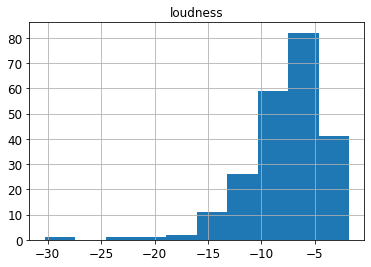

In [28]:
data.hist(column='loudness')
plt.show()

In [29]:
data['loudness'].describe()

count    224.000000
mean      -7.744844
std        3.696906
min      -30.285000
25%       -9.411500
50%       -7.022000
75%       -5.237250
max       -1.810000
Name: loudness, dtype: float64

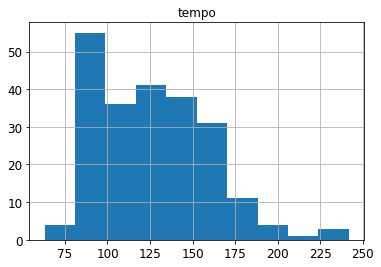

In [30]:
data.hist(column='tempo')
plt.show()

In [31]:
data['tempo'].describe()

count    224.000000
mean     127.232665
std       32.848995
min       63.017000
25%       96.062750
50%      126.584500
75%      149.914000
max      241.818000
Name: tempo, dtype: float64

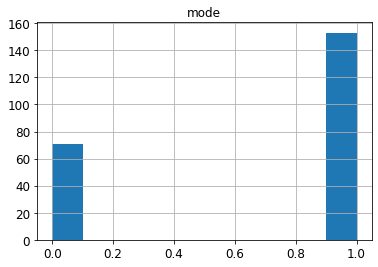

In [32]:
data.hist(column='mode')
plt.show()

In [33]:
data['mode'].describe()

count    224.000000
mean       0.683036
std        0.466335
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: mode, dtype: float64

In [34]:
corr_matrix = data.corr()

print(corr_matrix["arousal"].sort_values(ascending=False))
print("\n")
print(corr_matrix["valence"].sort_values(ascending=False))

arousal       1.000000
loudness      0.349204
tempo         0.131068
valence       0.082126
dzr_sng_id    0.033910
mode         -0.033605
quadrant     -0.760806
Name: arousal, dtype: float64


valence       1.000000
arousal       0.082126
tempo         0.078329
loudness      0.050017
dzr_sng_id   -0.058822
mode         -0.065716
quadrant     -0.281893
Name: valence, dtype: float64


## Univariate Linear Regression 

Loudness and Arousal

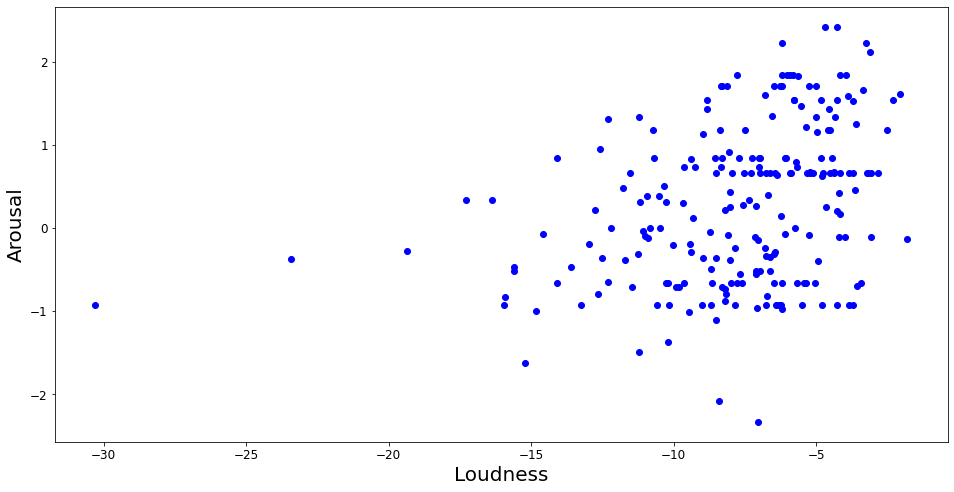

In [35]:
plt.figure(figsize=(16, 8))
plt.scatter(data['loudness'], data['arousal'], c='blue')
plt.xlabel("Loudness", fontsize = 20)
plt.ylabel("Arousal", fontsize = 20)
plt.show()

In [36]:
X = data['loudness'].values.reshape(-1,1)
y = data['arousal'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
print("The linear model is: Arousal = {:.5} + {:.5}*Loudness".format(reg.intercept_[0], reg.coef_[0][0]))

from sklearn.metrics import mean_squared_error, r2_score
print('Coefficient of determination: {:.2f}'.format(r2_score(y, y_pred))) #0.12
print('Mean squared error: {:.2f}'.format(mean_squared_error(y, y_pred))) #0.78

The linear model is: Arousal = 0.96906 + 0.089311*Loudness
Coefficient of determination: 0.12
Mean squared error: 0.78


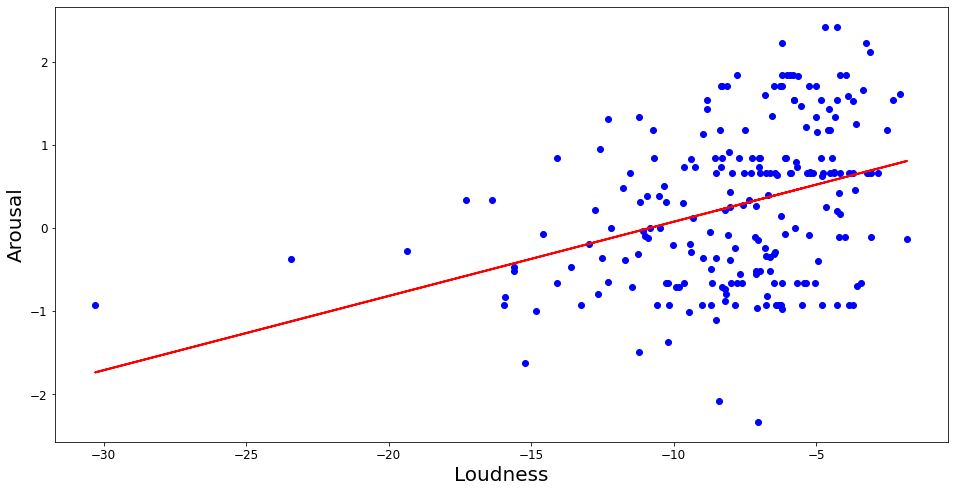

In [37]:
plt.figure(figsize=(16, 8))
plt.scatter(data['loudness'], data['arousal'], c='blue')
plt.plot(data['loudness'], y_pred, c='red',linewidth=2)
plt.xlabel("Loudness", fontsize = 20)
plt.ylabel("Arousal", fontsize = 20)
plt.show()

Tempo and Valence

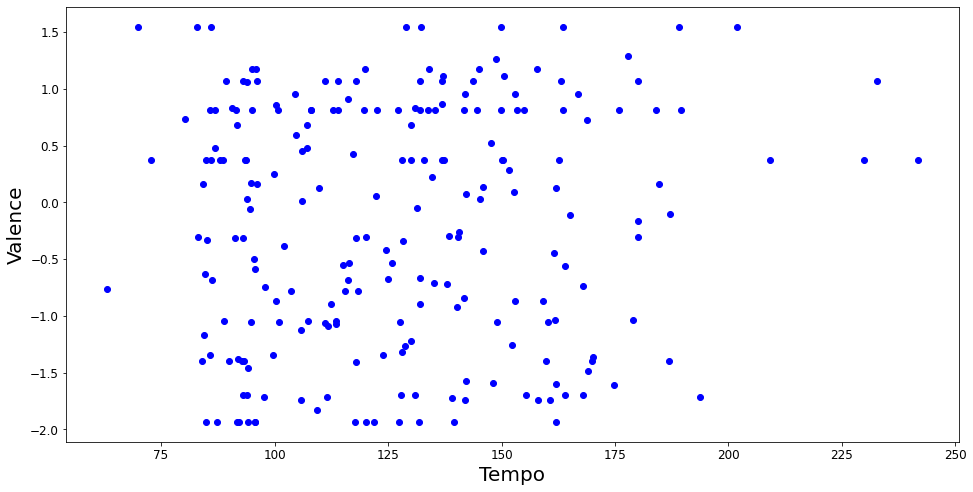

In [38]:
plt.figure(figsize=(16, 8))
plt.scatter(data['tempo'], data['valence'], c='blue')
plt.xlabel("Tempo", fontsize = 20)
plt.ylabel("Valence", fontsize = 20)
plt.show()

In [39]:
X = data['tempo'].values.reshape(-1,1)
y = data['valence'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
print("The linear model is: Valence = {:.5} + {:.5}*Tempo".format(reg.intercept_[0], reg.coef_[0][0]))

from sklearn.metrics import mean_squared_error, r2_score
print('Coefficient of determination: {:.2f}'.format(r2_score(y, y_pred)))
print('Mean squared error: {:.2f}'.format(mean_squared_error(y, y_pred)))

The linear model is: Valence = -0.52148 + 0.0025257*Tempo
Coefficient of determination: 0.01
Mean squared error: 1.11


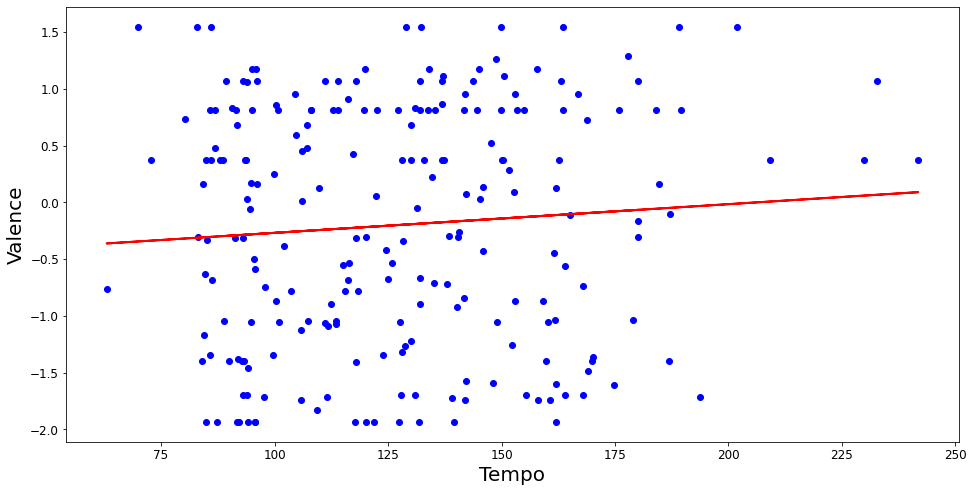

In [40]:
plt.figure(figsize=(16, 8))
plt.scatter(data['tempo'], data['valence'], c='blue')
plt.plot(data['tempo'], y_pred, c='red',linewidth=2)
plt.xlabel("Tempo", fontsize = 20)
plt.ylabel("Valence", fontsize = 20)
plt.show()

## Multiple Linear Regression

In [41]:
Xs = data[['mode','tempo','loudness']]
y = data['arousal'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
y_pred = reg.predict(Xs)
print("The linear model is: Y = {:.5} + {:.5}*mode + {:.5}*tempo + {:.5}*loudness".format(reg.intercept_[0], 
                                                       reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

from sklearn.metrics import mean_squared_error, r2_score
print('Coefficient of determination: {:.2f}'.format(r2_score(y, y_pred)))
print('Mean squared error: {:.2f}'.format(mean_squared_error(y, y_pred)))

The linear model is: Y = 0.63177 + -0.040674*mode + 0.0027218*tempo + 0.086888*loudness
Coefficient of determination: 0.13
Mean squared error: 0.77
